In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
main_df = pd.read_csv('attrition.csv')
main_df.shape

(1470, 36)

In [3]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   object 
 8   EmployeeCount             1470 non-null   int64  
 9   EmployeeNumber            1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [4]:
main_df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [5]:
main_df.drop(['Over18','EmployeeCount','EmployeeNumber','StandardHours'],axis=1,inplace=True)

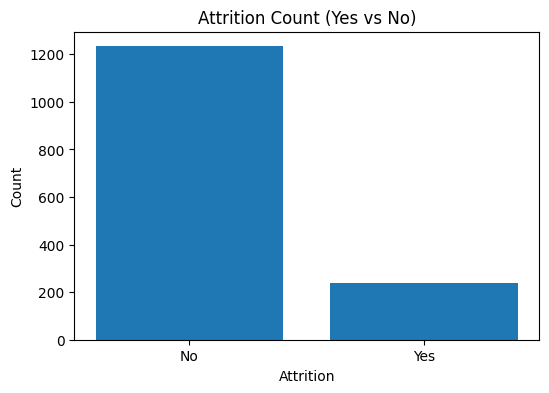

In [6]:
counts = main_df["Attrition"].value_counts()
plt.figure(figsize=(6,4))
plt.bar(counts.index, counts.values)
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.title("Attrition Count (Yes vs No)")
plt.show()

In [7]:
categorical_cols = main_df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    print(main_df[col].value_counts())
    print("\n")

Attrition
No     1233
Yes     237
Name: count, dtype: int64


BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64


Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64


EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64


Gender
Male      882
Female    588
Name: count, dtype: int64


JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64


MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64


OverTime
No    

In [8]:
main_df['Attrition']=main_df['Attrition'].map({'Yes':1,'No':0})
main_df['Gender']=main_df['Gender'].map({'Male':1,'Female':0})
main_df['OverTime']=main_df['OverTime'].map({'Yes':1,'No':0})

In [9]:
main_df_encoded=pd.get_dummies(main_df,columns=['BusinessTravel','Department','EducationField','JobRole',
                                'MaritalStatus'],drop_first=True,prefix=['BusinessTravel','Department',
                                'EducationField','JobRole','MaritalStatus'],dtype=int)

In [10]:
main_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   int64  
 1   Attrition                          1470 non-null   int64  
 2   DailyRate                          1470 non-null   int64  
 3   DistanceFromHome                   1470 non-null   int64  
 4   Education                          1470 non-null   int64  
 5   EnvironmentSatisfaction            1470 non-null   int64  
 6   Gender                             1470 non-null   int64  
 7   HourlyRate                         1470 non-null   int64  
 8   JobInvolvement                     1470 non-null   int64  
 9   JobLevel                           1470 non-null   int64  
 10  JobSatisfaction                    1470 non-null   int64  
 11  MonthlyIncome                      1470 non-null   int64

In [11]:
from sklearn.model_selection import train_test_split

X = main_df_encoded.drop("Attrition", axis=1)   
y = main_df_encoded["Attrition"]                

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

random_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=20, stop=200, num=10)],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': list(range(1, 11)),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True],
}

In [19]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier(random_state=42)

rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=random_grid,
    n_iter=100,              
    cv=3,                   
    verbose=2,
    random_state=42,
    n_jobs=-1               
)

rf_random.fit(X_train, y_train)

print("Best Parameters:")
print(rf_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\Admin\Desktop\PPA\PPA_specific\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
84 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
84 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Admin\Desktop\PPA\PPA_specific\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\Desktop\PPA\PPA_specific\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\Users\Admin\Desktop\PPA\PPA_specific\Lib\site-

Best Parameters:
{'n_estimators': 180, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'entropy', 'bootstrap': True}


In [20]:
best_rf = rf_random.best_estimator_
print(best_rf)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=180,
                       random_state=42)


In [23]:
print("OOB Score:", best_rf.oob_score_)

AttributeError: 'RandomForestClassifier' object has no attribute 'oob_score_'

In [21]:
feature_imp = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_rf.feature_importances_
}).sort_values('Importance', ascending=False)
feature_imp

,Feature,Importance
10,MonthlyIncome,0.072698
0,Age,0.062915
18,TotalWorkingYears,0.061243
1,DailyRate,0.053711
6,HourlyRate,0.050979
11,MonthlyRate,0.046748
2,DistanceFromHome,0.042598
13,OverTime,0.041267
21,YearsAtCompany,0.041152
24,YearsWithCurrManager,0.037171


In [22]:
from sklearn.metrics import confusion_matrix

y_train_pred = best_rf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

cm_train = confusion_matrix(y_train, y_train_pred)
print("\nTraining Confusion Matrix:")
print(cm_train)

Training Accuracy: 0.9795918367346939

Training Confusion Matrix:
[[986   0]
 [ 24 166]]


In [17]:
y_pred = best_rf.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.8299319727891157

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       247
           1       0.38      0.11      0.17        47

    accuracy                           0.83       294
   macro avg       0.62      0.54      0.54       294
weighted avg       0.78      0.83      0.79       294

